Copyright **`(c)`** 2025 Giovanni Squillero `<giovanni.squillero@polito.it>`  
[`https://github.com/squillero/computational-intelligence`](https://github.com/squillero/computational-intelligence)  
Free under certain conditions — see the [`license`](https://github.com/squillero/computational-intelligence/blob/master/LICENSE.md) for details.  

In [1]:
import logging
from itertools import combinations

import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

Cost: $d + (d \cdot \alpha \cdot w)^\beta$

In [2]:
class Problem:
    _graph: nx.Graph
    _alpha: float
    _beta: float

    def __init__(
        self,
        num_cities: int,
        *,
        alpha: float = 1.0,
        beta: float = 1.0,
        density: float = 0.5,
        seed: int = 42,
    ):
        rng = np.random.default_rng(seed)
        self._alpha = alpha
        self._beta = beta
        cities = rng.random(size=(num_cities, 2))
        cities[0, 0] = cities[0, 1] = 0.5

        self._graph = nx.Graph()
        self._graph.add_node(0, pos=(cities[0, 0], cities[0, 1]), gold=0)
        for c in range(1, num_cities):
            self._graph.add_node(c, pos=(cities[c, 0], cities[c, 1]), gold=(1 + 999 * rng.random()))

        tmp = cities[:, np.newaxis, :] - cities[np.newaxis, :, :]
        d = np.sqrt(np.sum(np.square(tmp), axis=-1))
        for c1, c2 in combinations(range(num_cities), 2):
            if rng.random() < density or c2 == c1 + 1:
                self._graph.add_edge(c1, c2, dist=d[c1, c2])

        assert nx.is_connected(self._graph)

    @property
    def graph(self) -> nx.Graph:
        return nx.Graph(self._graph)

    def cost(self, path, weight):
        dist = nx.path_weight(self._graph, path, weight='dist')
        return dist + (self._alpha * dist * weight) ** self._beta

    def baseline(self):
        cost = 0
        for dest, path in nx.single_source_dijkstra_path(
            self._graph, source=0, weight='weight'
        ).items():
            if dest == 0:
                continue
            logging.debug(
                f"dummy_solution: go to {dest} ({' > '.join(str(n) for n in path)}) -- cost: {self.cost(path, 0):.2f}"
            )
            logging.debug(f"dummy_solution: grab {self._graph.nodes[dest]['gold']:.2f}kg of gold")
            logging.debug(
                f"dummy_solution: return to 0 ({' > '.join(str(n) for n in reversed(path))}) -- cost: {self.cost(path, self._graph.nodes[dest]['gold']):.2f}"
            )
            cost += self.cost(path, 0) + self.cost(path, self._graph.nodes[dest]['gold'])
        logging.info(f"dummy_solution: total cost: {cost:.2f}")
        return cost

    def plot(self):
        plt.figure(figsize=(10, 10))
        pos = nx.get_node_attributes(self._graph, 'pos')
        size = [100] + [self._graph.nodes[n]['gold'] for n in range(1, len(self._graph))]
        color = ['red'] + ['lightblue'] * (len(self._graph) - 1)
        return nx.draw(self._graph, pos, with_labels=True, node_color=color, node_size=size)

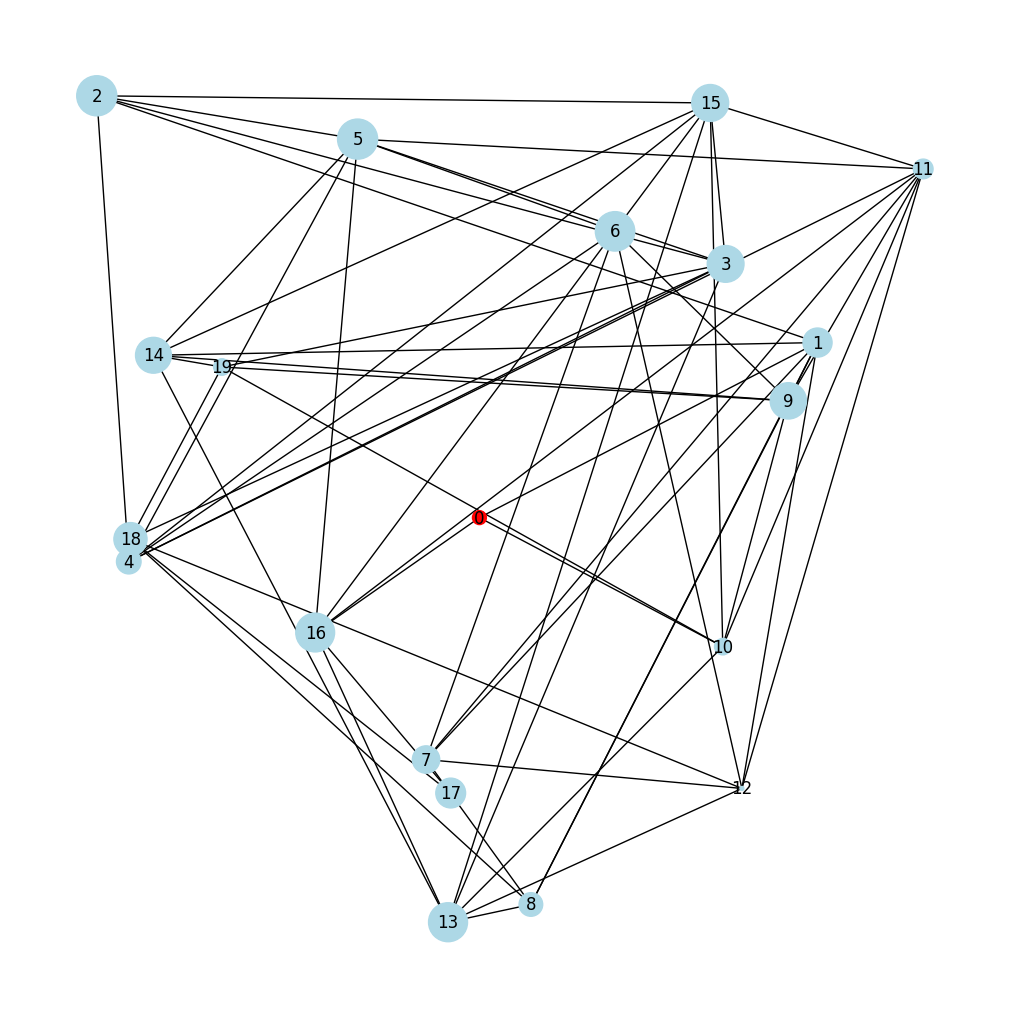

In [3]:
P = Problem(20, density=0.2, alpha=1, beta=1)
P.plot()

In [ ]:
logging.getLogger().setLevel(logging.INFO)

Problem(100, density=0.2, alpha=1, beta=1).baseline()
Problem(100, density=0.2, alpha=2, beta=1).baseline()
Problem(100, density=0.2, alpha=1, beta=2).baseline()
Problem(100, density=1, alpha=1, beta=1).baseline()
Problem(100, density=1, alpha=2, beta=1).baseline()
Problem(100, density=1, alpha=1, beta=2).baseline()
Problem(1_000, density=0.2, alpha=1, beta=1).baseline()
Problem(1_000, density=0.2, alpha=2, beta=1).baseline()
Problem(1_000, density=0.2, alpha=1, beta=2).baseline()
Problem(1_000, density=1, alpha=1, beta=1).baseline()
Problem(1_000, density=1, alpha=2, beta=1).baseline()
Problem(1_000, density=1, alpha=1, beta=2).baseline()
None

INFO:root:dummy_solution: total cost: 38815.58
INFO:root:dummy_solution: total cost: 77458.97
INFO:root:dummy_solution: total cost: 24369662.26
INFO:root:dummy_solution: total cost: 18266.19
INFO:root:dummy_solution: total cost: 36457.92
INFO:root:dummy_solution: total cost: 5404978.09
INFO:root:dummy_solution: total cost: 358160.25
INFO:root:dummy_solution: total cost: 714872.46
INFO:root:dummy_solution: total cost: 198612615.83
INFO:root:dummy_solution: total cost: 192936.23
INFO:root:dummy_solution: total cost: 385105.64
INFO:root:dummy_solution: total cost: 57580018.87
